In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from brokenaxes import brokenaxes

#plt.style.use('ggplot')

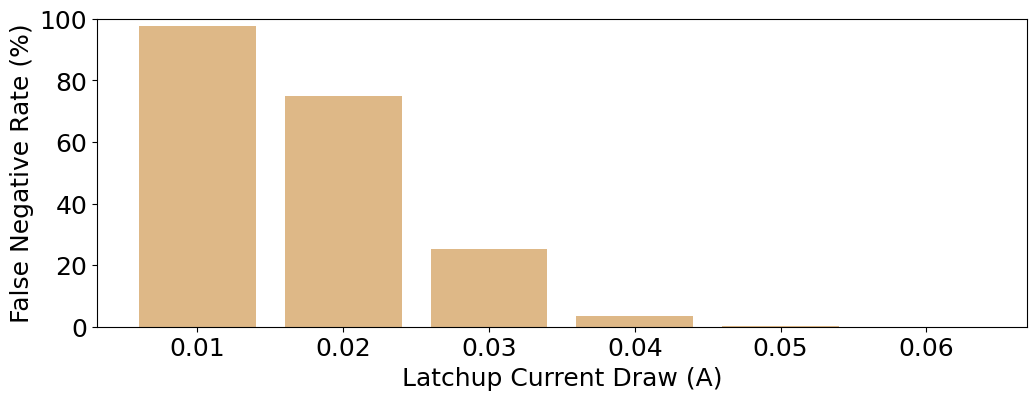

In [2]:
fn_rates = [97.54339993449066,
            74.84441532918441,
            25.319358008516213,
            03.37373075663282,
            00.16377333770062341,
            0.0]
latchup_magnitudes = ["0.01", "0.02", "0.03", "0.04", "0.05", "0.06"]

plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(12,4))
plt.bar(latchup_magnitudes, fn_rates, color="burlywood")
plt.xlabel("Latchup Current Draw (A)")
plt.ylabel("False Negative Rate (%)")
#plt.title("False Negative Rate with Variable Latchup Current")
plt.savefig("sel_false_neg_rates.pdf", format="pdf", bbox_inches="tight")

axes = plt.gca()
axes.set_ylim([0, 100])

plt.savefig("sel_false_neg_rates.pdf", format="pdf", bbox_inches="tight")

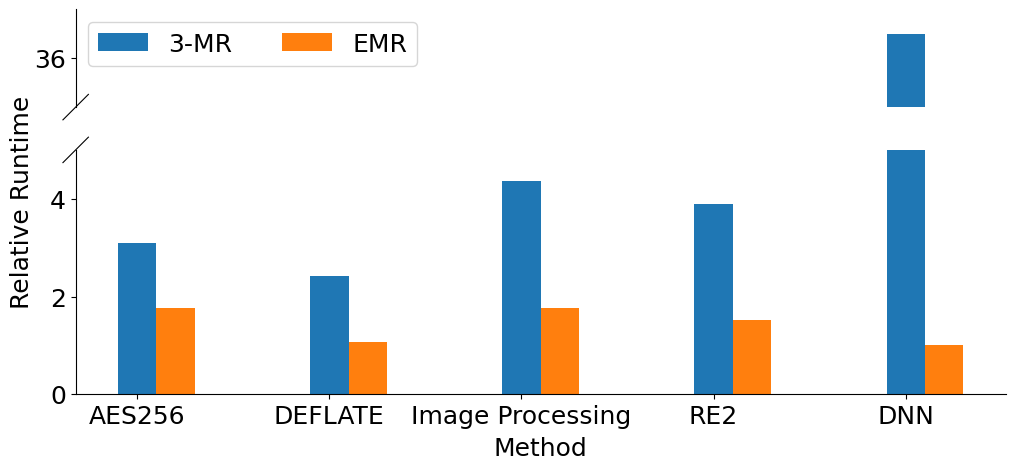

In [12]:
tests = ['AES256', 'DEFLATE', 'Image Processing', 'RE2', 'DNN']

runtimes = {
    '3-MR': [100.36 / 32.4, 217.8 / 90.15, 2514 / 576, 163.9 / 42.17, 1193.00 / 32.68],
    'EMR': [56.9 / 32.4, 96.4 / 90.15, 1019 / 576, 64.2 / 42.17, 32.76 / 32.68]
}

plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(12,5))
bax = brokenaxes(ylims=((0, 5), (35, 37)), hspace=0.25)

x = np.arange(len(tests))
width = 0.2  # the width of the bars
multiplier = 0

#fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in runtimes.items():
    offset = width * multiplier
    rects = bax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

bax.set_xlabel("Method", labelpad=30)
bax.set_ylabel("Relative Runtime", labelpad=30)
bax.axs[1].set_xticks(np.arange(len(tests)))
bax.axs[1].set_xticklabels(tests)
bax.legend(loc='upper left', ncols=2)
#plt.title("EMR Workloads Relative Runtimes")

plt.savefig("seu_runtimes.pdf", format="pdf", bbox_inches="tight")

In [4]:
tmr = [100.36 / 32.4, 217.8 / 90.15, 2514 / 576, 163.9 / 42.17, 1193.00 / 32.68]
emr = [56.9 / 32.4, 96.4 / 90.15, 1019 / 576, 64.2 / 42.17, 32.76 / 32.68]
avg = [0, 0, 0, 0, 0]

for i in range(0, 5):
    avg[i] = emr[i] / tmr[i]

1 - sum(avg) / len(avg)

0.6331881124044045

In [5]:
[13.2 - sum([5.8, 2.0, 5.3, 0.0]),
 21.8 - sum([5.4, 5.3, 8.1, 0.0]),
 46.3 - sum([12.7, 6.4, 11.0, 14.4]),
 100.6 - sum([20.9, 14.0, 17.4, 45.5]),
 56.87 - sum([5.7, 6.8, 40.1, 0.0]),
 82.2 - sum([28.5, 0.0, 53.7, 0.0]),
 164.9 - sum([94.7, 0.0, 70.1, 0.0]),
 256.6 - sum([162.1, 0.0, 94.5, 0.0]),
 93.2 - sum([28.0, 0.0, 65.2, 0.0])]

[0.09999999999999964,
 3.0,
 1.7999999999999972,
 2.799999999999997,
 4.269999999999996,
 0.0,
 0.09999999999999432,
 0.0,
 0.0]

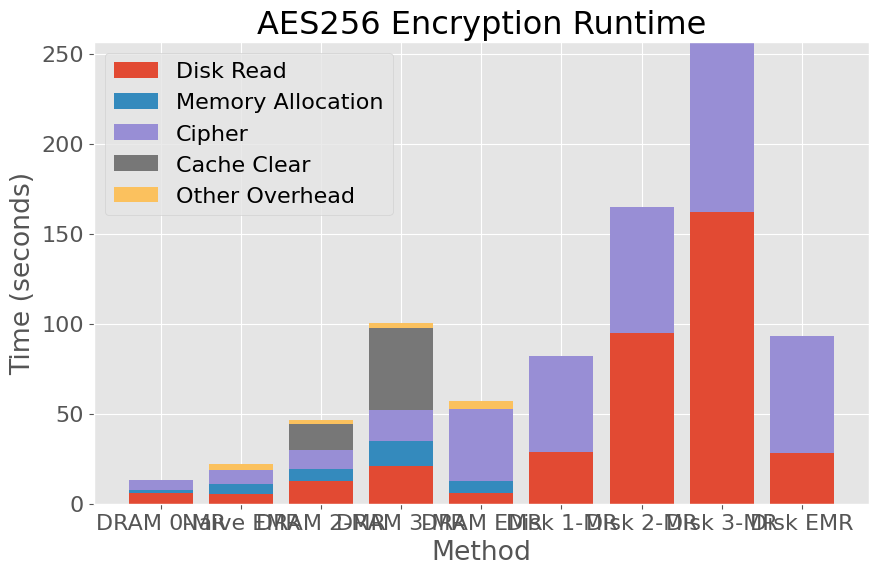

In [6]:
methods = ["DRAM 0-MR", "Naive EMR", "DRAM 2-MR", "DRAM 3-MR", "DRAM EMR", "Disk 1-MR", "Disk 2-MR", "Disk 3-MR", "Disk EMR"]

disk = np.array([5.8, 5.4, 12.7, 20.9, 5.7, 28.5, 94.7, 162.1, 28.0])
malloc = np.array([2.0, 5.3, 6.4, 14.0, 6.8, 0.0, 0.0, 0.0, 0.0])
cipher = np.array([5.3, 8.1, 11.0, 17.4, 40.1, 53.7, 70.1, 94.5, 65.2])
cache_clear = np.array([0.0, 0.0, 14.4, 45.5, 0.0, 0.0, 0.0, 0.0, 0.0])
other = np.array([0.1, 3.0, 1.8, 2.8, 4.2, 0.0, 0.1, 0.0, 0.0])

plt.figure(figsize=(10,6))
plt.bar(methods, disk)
plt.bar(methods, malloc, bottom=disk)
plt.bar(methods, cipher, bottom=disk+malloc)
plt.bar(methods, cache_clear, bottom=disk+malloc+cipher)
plt.bar(methods, other, bottom=disk+malloc+cipher+cache_clear)
plt.xlabel("Method")
plt.ylabel("Time (seconds)")
plt.legend(["Disk Read", "Memory Allocation", "Cipher", "Cache Clear", "Other Overhead"])
plt.title("AES256 Encryption Runtime")
plt.savefig("encrypt_runtime.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [7]:
[57.9 - sum([6.3, 0.2, 51.4, 0]),
 79.6 - sum([5.6, 0.4, 73.5, 0]),
 129.0 - sum([11.8, 0.5, 103.2, 13.5]),
 217.8 - sum([17.8, 0.9, 153.4, 42.4]),
 96.4 - sum([5.7, 0.4, 90.2, 0.0]),
 115.3 - sum([22.9, 0.0, 92.4, 0.0]),
 248.3 - sum([86.4, 0.0, 161.9, 0.0]),
 373.9 - sum([148.3, 0.0, 225.6, 0.0]),
 105.3 - sum([22.6, 0.0, 82.7, 0.0])]

[0.0,
 0.09999999999999432,
 0.0,
 3.3000000000000114,
 0.10000000000000853,
 -1.4210854715202004e-14,
 0.0,
 0.0,
 -1.4210854715202004e-14]

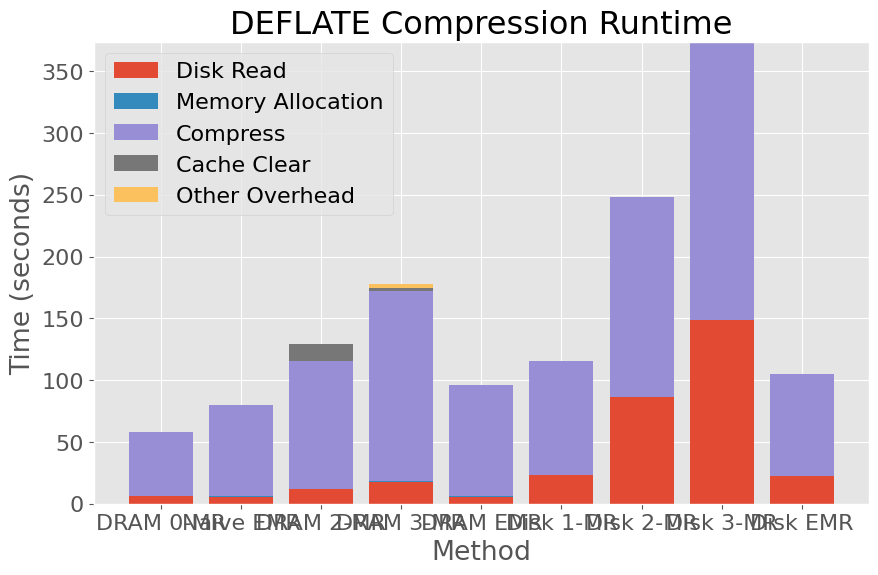

In [8]:
methods = ["DRAM 0-MR", "Naive EMR", "DRAM 2-MR", "DRAM 3-MR", "DRAM EMR", "Disk 1-MR", "Disk 2-MR", "Disk 3-MR", "Disk EMR"]

disk = np.array([6.3, 5.6, 11.8, 17.8, 5.7, 22.9, 86.4, 148.3, 22.6])
malloc = np.array([0.2, 0.4, 0.5, 0.9, 0.4, 0.0, 0.0, 0.0, 0.0])
cipher = np.array([51.4, 73.5, 103.2, 153.4, 90.2, 92.4, 161.9, 225.6, 82.7])
cache_clear = np.array([0.0, 0.0, 13.5, 2.4, 0.0, 0.0, 0.0, 0.0, 0.0])
other = np.array([0.0, 0.1, 0.0, 3.3, 0.1, 0.0, 0.0, 0.0, 0.0])

plt.figure(figsize=(10,6))
plt.bar(methods, disk)
plt.bar(methods, malloc, bottom=disk)
plt.bar(methods, cipher, bottom=disk+malloc)
plt.bar(methods, cache_clear, bottom=disk+malloc+cipher)
plt.bar(methods, other, bottom=disk+malloc+cipher+cache_clear)
plt.xlabel("Method")
plt.ylabel("Time (seconds)")
plt.legend(["Disk Read", "Memory Allocation", "Compress", "Cache Clear", "Other Overhead"])
plt.title("DEFLATE Compression Runtime")
plt.savefig("compress_runtime.pdf", format="pdf", bbox_inches="tight")
plt.show()

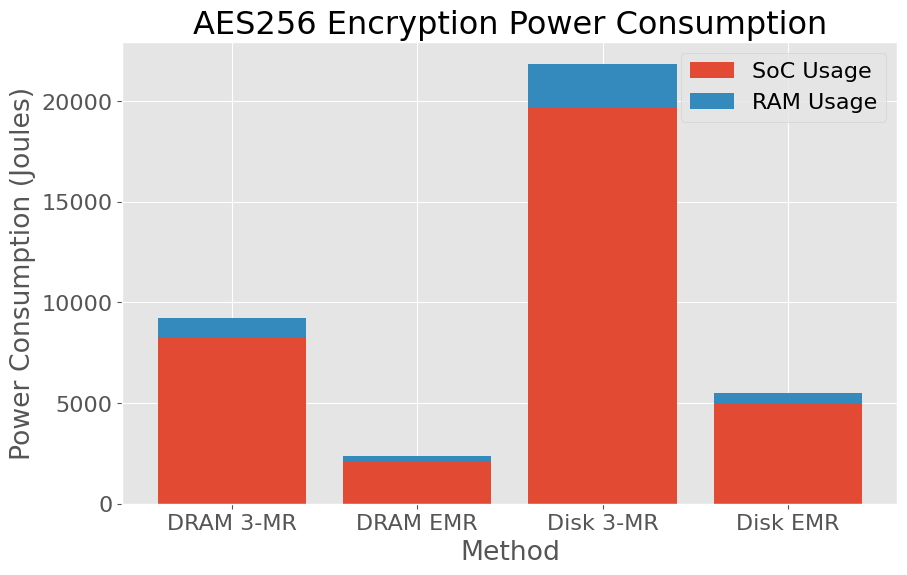

In [9]:
methods = ["DRAM 3-MR", "DRAM EMR", "Disk 3-MR", "Disk EMR"]

ram = np.array([975.92, 230.84, 2210.69, 545.43])
soc = np.array([8246.51, 2132.28, 19635.47, 4961.25])

plt.figure(figsize=(10,6))
plt.bar(methods, soc)
plt.bar(methods, ram, bottom=soc)
plt.xlabel("Method")
plt.ylabel("Power Consumption (Joules)")
plt.legend(["SoC Usage", "RAM Usage"])
plt.title("AES256 Encryption Power Consumption")
plt.savefig("encrypt_power.pdf", format="pdf", bbox_inches="tight")

plt.show()

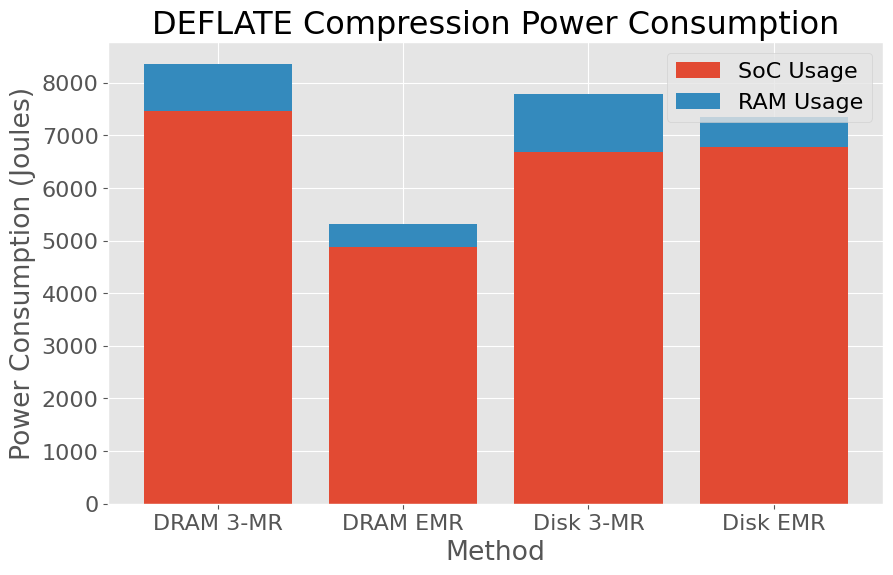

In [10]:
methods = ["DRAM 3-MR", "DRAM EMR", "Disk 3-MR", "Disk EMR"]

ram = np.array([894.53, 429.37, 1107.91, 570.38])
soc = np.array([7468.48, 4878.97, 6678.52, 6782.58])

plt.figure(figsize=(10,6))
plt.bar(methods, soc)
plt.bar(methods, ram, bottom=soc)
plt.xlabel("Method")
plt.ylabel("Power Consumption (Joules)")
plt.legend(["SoC Usage", "RAM Usage"])
plt.title("DEFLATE Compression Power Consumption")
plt.savefig("zip_power.pdf", format="pdf", bbox_inches="tight")

plt.show()

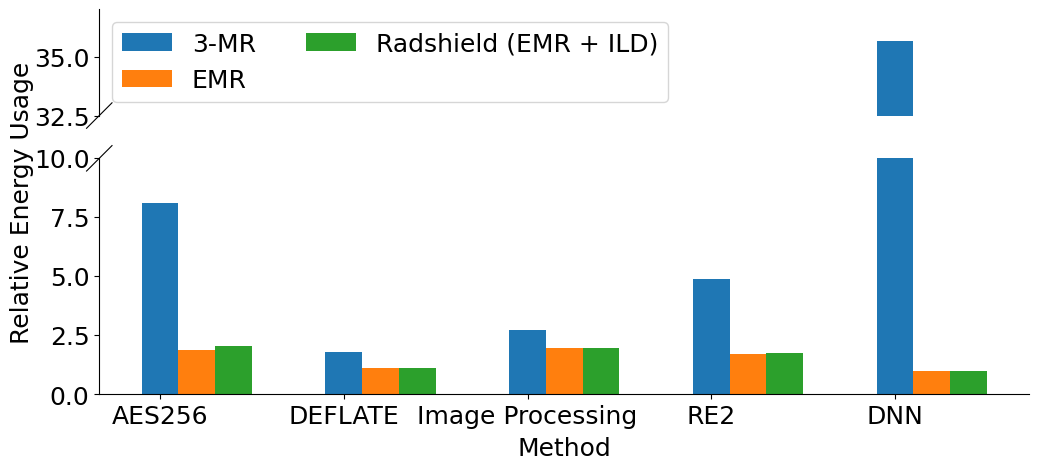

In [13]:
tests = ['AES256', 'DEFLATE', 'Image Processing', 'RE2', 'DNN']

runtimes = {
    '3-MR': [(8246.51 + 975.92) / (1011.74 + 124.26),
             (7468.48 + 894.53) / (4303 + 376.18),
             (94982.08 + 11080.88) / (35829.51 + 3216.26),
             (1684.9 + 206.15) / (347.33 + 39.76),
             (323475.25 + 38397.26) / (9049.77 + 1092.58)],
    'EMR': [(1939.17 + 216.00) / (1011.74 + 124.26),
            (4839.14 + 428.74) / (4303 + 376.18),
            (71511.19 + 5744.81) / (35829.51 + 3216.26),
            (591.89 + 63.66) / (347.33 + 39.76),
            (9069.84 + 1109.56) / (9049.77 + 1092.58)],
    'Radshield (EMR + ILD)': [(2100.86 + 227.77) / (1011.74 + 124.26),
                  (4871.73 + 429.60) / (4303 + 376.18),
                  (71592.40 + 5769.63) / (35829.51 + 3216.26),
                  (615.35 + 64.91) / (347.33 + 39.76),
                  (9117.53 + 1072.83) / (9049.77 + 1092.58)]
}

plt.figure(figsize=(12,5))
bax = brokenaxes(ylims=((0, 10), (32.5, 37)), hspace=0.25)

x = np.arange(len(tests))
width = 0.2  # the width of the bars
multiplier = 0

#fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in runtimes.items():
    offset = width * multiplier
    rects = bax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

bax.set_xlabel("Method", labelpad=30)
bax.set_ylabel("Relative Energy Usage", labelpad=47)
bax.axs[1].set_xticks(np.arange(len(tests)))
bax.axs[1].set_xticklabels(tests)
bax.legend(loc='upper left', ncols=2)
#plt.title("EMR Workloads Relative Energy Usage")
plt.savefig("seu_powers.pdf", format="pdf", bbox_inches="tight")

In [12]:
tmr = [(8246.51 + 975.92) / (1011.74 + 124.26),
 (7468.48 + 894.53) / (4303 + 376.18),
 (94982.08 + 11080.88) / (35829.51 + 3216.26),
 (1684.9 + 206.15) / (347.33 + 39.76),
 (323475.25 + 38397.26) / (9049.77 + 1092.58)]

emr = [(2100.86 + 227.77) / (1011.74 + 124.26),
 (4871.73 + 429.60) / (4303 + 376.18),
 (71592.40 + 5769.63) / (35829.51 + 3216.26),
 (615.35 + 64.91) / (347.33 + 39.76),
 (9117.53 + 1072.83) / (9049.77 + 1092.58)]

for i in range(0, 5):
    avg[i] = emr[i] / tmr[i]

1 - sum(avg) / len(avg)

0.5992636188622491

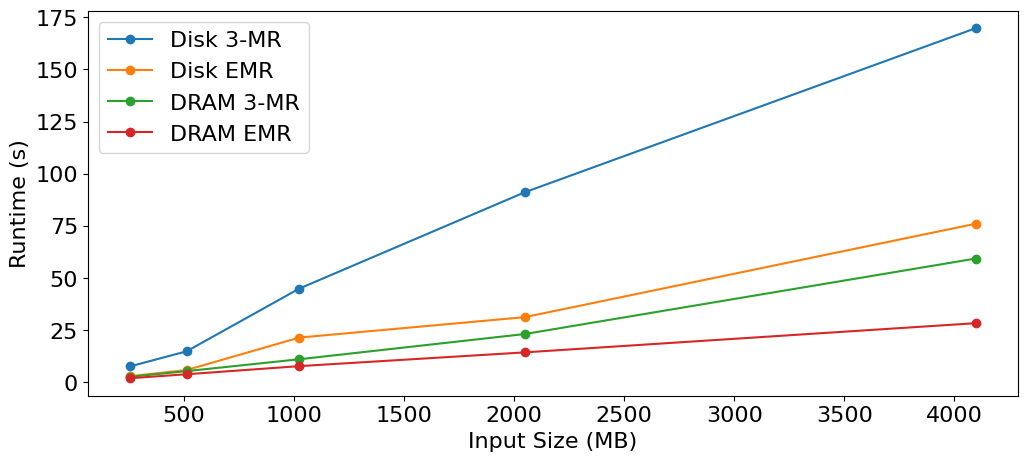

In [5]:
runtimes_crypt = [2.6, 5.3, 11.0, 23.1, 59.3]
runtimes_crypt_disk = [7.6, 14.8, 44.9, 91.1, 169.8]
runtimes_dtss_crypt = [1.9, 3.8, 7.7, 14.3, 28.3]
runtimes_dtss_crypt_disk = [2.9, 5.8, 21.4, 31.2, 76.0]
data_sizes = [256, 512, 1024, 2048, 4096]

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(12,5))

plt.plot(data_sizes, runtimes_crypt_disk, marker='o', label="Disk TMR")
plt.plot(data_sizes, runtimes_dtss_crypt_disk, marker='o', label="Disk EMR")
plt.plot(data_sizes, runtimes_crypt, marker='o', label="DRAM TMR")
plt.plot(data_sizes, runtimes_dtss_crypt, marker='o', label="DRAM EMR")
plt.legend(["Disk 3-MR", "Disk EMR", "DRAM 3-MR", "DRAM EMR"])
plt.xlabel("Input Size (MB)")
plt.ylabel("Runtime (s)")
#plt.title("AES256 Encryption Runtime")
plt.savefig("seu_crypt_runtimes.pdf", format="pdf", bbox_inches="tight")
plt.show()

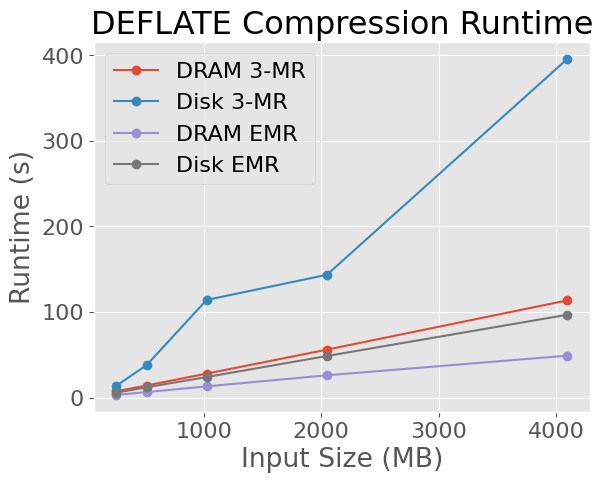

In [14]:
runtimes_zip = [7.4, 14.1, 28.0, 56.0, 113.6]
runtimes_zip_disk = [13.9, 37.8, 114.1, 143.5, 395.8]
runtimes_dtss_zip = [3.1, 6.4, 13.1, 26.0, 49.0]
runtimes_dtss_zip_disk = [5.8, 12.0, 24.0, 48.6, 96.8]
data_sizes = [256, 512, 1024, 2048, 4096]

plt.plot(data_sizes, runtimes_zip, marker='o', label="DRAM TMR")
plt.plot(data_sizes, runtimes_zip_disk, marker='o', label="Disk TMR")
plt.plot(data_sizes, runtimes_dtss_zip, marker='o', label="DRAM EMR")
plt.plot(data_sizes, runtimes_dtss_zip_disk, marker='o', label="Disk EMR")
plt.legend(["DRAM 3-MR", "Disk 3-MR", "DRAM EMR", "Disk EMR"])
plt.xlabel("Input Size (MB)")
plt.ylabel("Runtime (s)")
plt.title("DEFLATE Compression Runtime")
plt.savefig("seu_zip_runtimes.pdf", format="pdf", bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

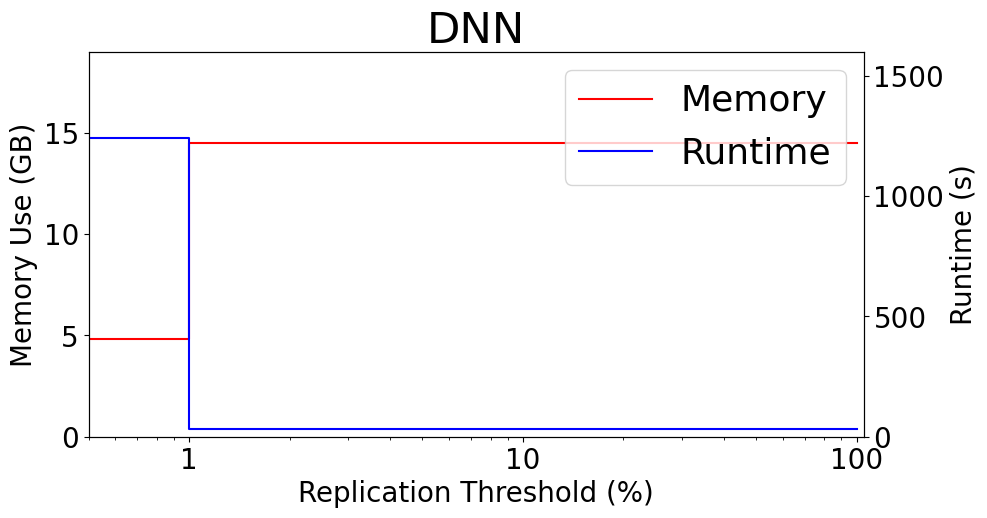

In [9]:
plt.figure()
fig, ax = plt.subplots()
ax2 = ax.twinx()
fig.set_size_inches(10, 5)
plt.rcParams.update({'font.size': 26})

ax.set_xlabel("Replication Threshold (%)")
ax.set_ylabel("Memory Use (GB)")
ax2.set_ylabel("Runtime (s)")

ax.set_xlim(0.5, 105)
ax.set_ylim(0, 19)
ax2.set_ylim(0, 1600)

ax.set_xscale('log')
ax2.set_xscale('log')

p1 = ax.step([0, 0.999, 1, 30, 100], [4.8, 4.8, 14.5, 14.5, 14.5], color='red', label="Memory")
p2 = ax2.step([0, 0.999, 1, 30, 100], [1241.5, 1241.5, 31.23, 31.71, 31.71], color='blue', label="Runtime")

plt.title('DNN')
ax.legend(handles=p1+p2, loc='upper right')

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.savefig("replication_dnn.pdf", format="pdf", bbox_inches="tight")
plt.show()

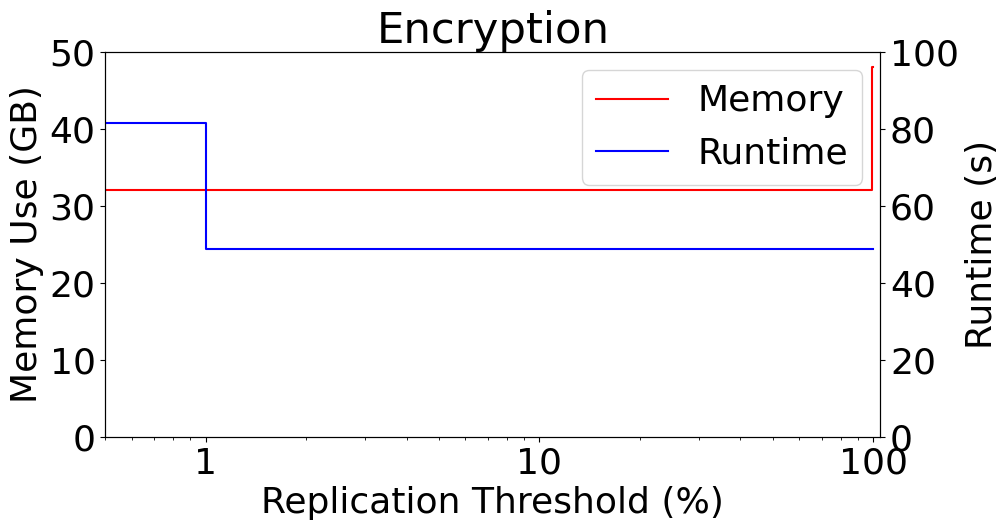

In [10]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
fig.set_size_inches(10, 5)
plt.rcParams.update({'font.size': 26})

ax.set_xlabel("Replication Threshold (%)")
ax.set_ylabel("Memory Use (GB)")
ax2.set_ylabel("Runtime (s)")

ax.set_xlim(0.5, 105)
ax.set_ylim(0, 50)
ax2.set_ylim(0, 100)

ax.set_xscale('log')
ax2.set_xscale('log')

p1 = ax.step([0, 1, 99, 100], [32, 32, 32, 48], color='red', label="Memory")
p2 = ax2.step([0, 0.999999, 1, 100], [81.36, 81.36, 48.87, 48.87], color='blue', label="Runtime")

plt.title('Encryption')
ax.legend(handles=p1+p2, loc='best')

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.savefig("replication_crypt.pdf", format="pdf", bbox_inches="tight")
plt.show()

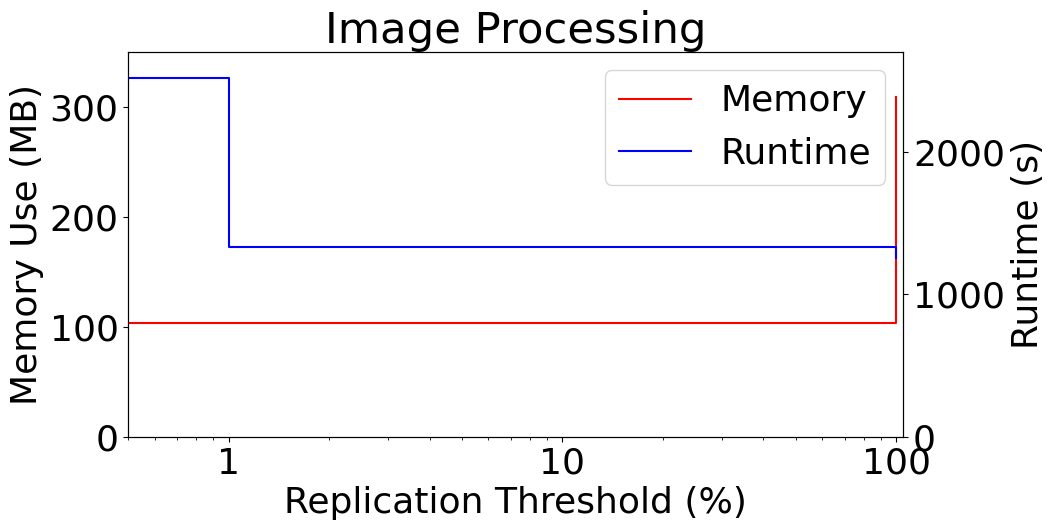

In [11]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
fig.set_size_inches(10, 5)
plt.rcParams.update({'font.size': 26})

ax.set_xlabel("Replication Threshold (%)")
ax.set_ylabel("Memory Use (MB)")
ax2.set_ylabel("Runtime (s)")

ax.set_xlim(0.5, 105)
ax.set_ylim(0, 350)
ax2.set_ylim(0, 2700)

ax.set_xscale('log')
ax2.set_xscale('log')

p1 = ax.step([0, 0.99999, 1, 99.9, 100], [103, 103, 103, 103, 309], color='red', label="Memory")
p2 = ax2.step([0, 0.99999, 1, 99.9, 100], [2516, 2516, 1330, 1330, 1251], color='blue', label="Runtime")

plt.title('Image Processing')
ax.legend(handles=p1+p2, loc='best')

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.savefig("replication_img.pdf", format="pdf", bbox_inches="tight")
plt.show()